## 神经网络的学习算法实践

### 神经网络的学习步骤

主要有以下4个步骤：

- 选取输入数据：mini-batch从数据中随机选取一部分数据进行训练
- 计算梯度：计算各个权重参数的梯度
- 更新参数：将权重参数沿着梯度方向进行更新
- 重复上面的1-3步

上面的选择数据的过程是随机的，所以这里的梯度下降法有称为（Stochastic gradient descent）随机梯度下降法（SGD）：对随机选择的数据进行的梯度下降法


### 两层神经网络的实践

利用前面的学习的方法来实践手写数字识别的案例，前面一个章节中，我们提到利用训练好的数据参数来直接进行预测。下面我们通过这一节讲到的方法来实现参数的训练。

实践的类如下coding:


In [2]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

class TowLayerNet:
    
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        # 符合高斯分布的随机数进行初始化
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
    # 预测和推理函数    
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        Z1 = np.dot(x,W1)+b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1,W2)+b2
        y = softmax(Z2)
        
        return y
    
    # 损失函数
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    # 计算识别精度
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    # 计算权重参数的梯度
    def numerical_gradient(self,x,t):
        # 定义损失函数
        loss_W  = lambda w: self.loss(x, t)
        
        # 计算相关的参数的偏导数
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    # 计算权重参数的梯度，高速版
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads
        
        
    
    
        

In [5]:
net = TowLayerNet(input_size=784,
                  hidden_size=100,
                 output_size=10)
# 获得参数的基本size
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [8]:
# 定义输入的数据和推理数据y
x =np.random.rand(100,784) #定义一个随机的数据
y = net.predict(x) 


In [ ]:
# 定义输入的数据和推理数据y
x = np.random.rand(100,784) #定义一个随机的数据
t = net.random.rand(100,10) 

grads = net.numerical_gradient(x,t)



### mini-batch 的实现

mini-batch是一种随机选取训练数据中的一部分，作为梯度下降法的更新的输入数据。下面尝试使用该方法来实践手写数识别的过程。


In [3]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

# 加载数据
(x_train,y_train),(x_test,y_test) = load_mnist(
                normalize=True,
                one_hot_label=True)

# 记录每次迭代的loss值
train_lost_list = []

#设置训练中参数
iters_num = 10000 # 训练次数
train_size = x_train.shape[0] #样本数量
batch_size = 100 #mini-batch的数量
learning_rate = 0.1 # 学习率

#定义一个两层的网络
# 隐藏层为50
network = TowLayerNet(input_size=784,
                     hidden_size=50,
                     output_size=10)

# 开始训练
for i in range(iters_num):
    # 随机选取输入的数据，选取的量为100个
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 计算梯度
    grad = network.gradient(x_batch,y_batch)
    
    # 更新参数
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #记录loss值
    loss = network.loss(x_batch,y_batch)
    train_lost_list.append(loss)

根据训练的数据记录loss值的变化情况，这里记录10000次训练的数据更新情况。可以看出随着学习的进行，损失函数的值在不断减小。这是学习正常进行的信号，表示神经网络的权重参数在逐渐拟合数据。

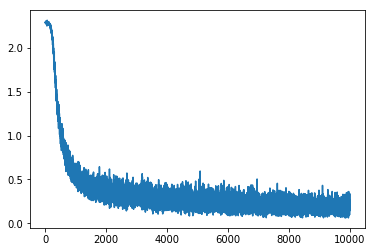

In [6]:
import  matplotlib.pyplot  as plt
%matplotlib inline

plt.plot(train_lost_list)

# plt.show()

### 利用测试数据评价模型

上面小节中我们利用了损失值来评价模型，可以看到模型的loss值是不断在减少，我得出结论是模型参数渐渐在符合我们预期的方向拟合。但是这里的loss值是针对训练数据来说的。

为了检测我们更新的参数是否具有泛化能力，这里泛化就是指能够利用我训练更新的参数用来检测不在训练集中的数据。说的简单点就是能用该模型来识别其他的数据集，也就我们这里说的测试集。

为了检测测试集的数据，我们这里需要记录测试的精度，在什么时候记录呢？这里我们需要引入epoch的概念。

#### epoch

这是本节使用的方法：
一个 epoch 表示学习中所有训练数据均被使用过一次时的更新次数。比如，对于 10000 笔训练数据，用大小为 100 笔数据的 mini-batch 进行学习时，重复随机梯度下降法 100 次，所有的训练数据就都被“看过”了  。此时，100 次就是一个 epoch。

一般的方法：
一般做法是事先将所有训练数据随机打乱，然后按指定的批次大小，按序生成 mini-batch。这样每个 mini-batch 均有一个索引号，比如此例可以是 0, 1, 2, ... , 99，然后用索引号可以遍历所有的 mini-batch。遍历一次所有数据，就称为一个epoch。请注意，本节中的mini-batch 每次都是随机选择的，所以不一定每个数据都会被看到


下面我只需要简单的修改上面的code,就可以实现如下：

In [7]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

# 加载数据
(x_train,y_train),(x_test,y_test) = load_mnist(
                normalize=True,
                one_hot_label=True)

# 记录每次迭代的loss值
train_lost_list = []
train_acc_list = [] #记录训练精度
test_acc_list = [] #记录测试精度
# 需要训练多次达到一个epoch
iter_per_epoch = max(train_size/batch_size,1)

#设置训练中参数
iters_num = 10000 # 训练次数
train_size = x_train.shape[0] #样本数量
batch_size = 100 #mini-batch的数量
learning_rate = 0.1 # 学习率

#定义一个两层的网络
# 隐藏层为50
network = TowLayerNet(input_size=784,
                     hidden_size=50,
                     output_size=10)

# 开始训练
for i in range(iters_num):
    # 随机选取输入的数据，选取的量为100个
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 计算梯度
    grad = network.gradient(x_batch,y_batch)
    
    # 更新参数
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #记录loss值
    loss = network.loss(x_batch,y_batch)
    train_lost_list.append(loss)
    
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,y_train)
        test_acc = network.accuracy(x_test,y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7896333333333333, 0.7909
train acc, test acc | 0.8733166666666666, 0.8755
train acc, test acc | 0.8964, 0.8978
train acc, test acc | 0.9063166666666667, 0.9093
train acc, test acc | 0.9136, 0.9147
train acc, test acc | 0.9194, 0.9193
train acc, test acc | 0.9224333333333333, 0.9224
train acc, test acc | 0.9270666666666667, 0.9275
train acc, test acc | 0.9288166666666666, 0.9299
train acc, test acc | 0.9326666666666666, 0.9327
train acc, test acc | 0.9356333333333333, 0.9343
train acc, test acc | 0.9372833333333334, 0.9344
train acc, test acc | 0.94065, 0.9385
train acc, test acc | 0.9423, 0.9393
train acc, test acc | 0.9447333333333333, 0.9418
train acc, test acc | 0.9464166666666667, 0.9427


No handles with labels found to put in legend.


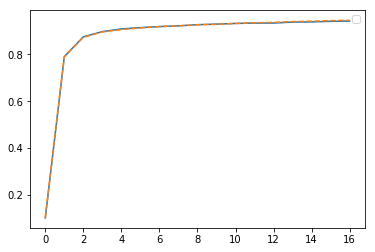

In [8]:
import  matplotlib.pyplot  as plt
%matplotlib inline

plt.plot(test_acc_list)
plt.plot(train_acc_list,linestyle="--")

plt.legend()


实线表示训练数据的识别精度，虚线表示测试数据的识别精度。
如图所示，随着 epoch 的前进（学习的进行），我们发现使用训练数据和测试数据评价的识别精度都提高了，并且，这两个识别精度基本上没有差异（两条线基本重叠在一起）。因此，可以说这次的学习中没有发生过拟合的现象。